In [1]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

random.seed(42)

from google.colab import drive
drive.mount('/content/gdrive')

#filePath ="/content/gdrive/My Drive/ML_TeamProject/PS_20174392719_1491204439457_log.csv"
filePath ="/content/gdrive/My Drive/PS_20174392719_1491204439457_log.csv"


import pandas as pd
data = pd.read_csv(filePath, sep=",", index_col=0)




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Dataset Selection
Our original dataset has over 6 millions records. Due to CPU process limitation we are going to select about to just 1 million record. Since the dataset does not have time seriese feature we picked the data randomly. 

In [2]:
df = data.sample(n=950000, random_state=random.seed(42))

print(df.info())

#outFile="/content/gdrive/My Drive/ML_TeamProject/Data950k.csv"
#df.to_csv(outFile, index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 950000 entries, 349 to 35
Data columns (total 10 columns):
type              950000 non-null object
amount            950000 non-null float64
nameOrig          950000 non-null object
oldbalanceOrg     950000 non-null float64
newbalanceOrig    950000 non-null float64
nameDest          950000 non-null object
oldbalanceDest    950000 non-null float64
newbalanceDest    950000 non-null float64
isFraud           950000 non-null int64
isFlaggedFraud    950000 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 79.7+ MB
None


#Check Data Quality
The First observatio from .info() is showing no blank data in any of those randomly seleted rows 

In [3]:
print(df.describe())

             amount  oldbalanceOrg  ...        isFraud  isFlaggedFraud
count  9.500000e+05   9.500000e+05  ...  950000.000000   950000.000000
mean   1.803053e+05   8.304480e+05  ...       0.001241        0.000002
std    6.162660e+05   2.881242e+06  ...       0.035207        0.001451
min    0.000000e+00   0.000000e+00  ...       0.000000        0.000000
25%    1.337762e+04   0.000000e+00  ...       0.000000        0.000000
50%    7.471929e+04   1.414700e+04  ...       0.000000        0.000000
75%    2.087199e+05   1.070475e+05  ...       0.000000        0.000000
max    6.676127e+07   4.368662e+07  ...       1.000000        1.000000

[8 rows x 7 columns]


#Observation 1: 
Less than 1 % of transactions flaged as fraud 

In [4]:
df.iloc[0:6].mean()   #Added just for learning 

amount            1.536123e+05
oldbalanceOrg     1.494818e+06
newbalanceOrig    1.579338e+06
oldbalanceDest    1.549014e+06
newbalanceDest    1.487142e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

#Lets Plot
Thinking of what type of the plot that we want to present.


(array([9.48849e+05, 8.46000e+02, 1.73000e+02, 7.10000e+01, 3.20000e+01,
        1.20000e+01, 4.00000e+00, 9.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 3.55380484e+07, 7.10760967e+07, 1.06614145e+08,
        1.42152193e+08, 1.77690242e+08, 2.13228290e+08, 2.48766338e+08,
        2.84304387e+08, 3.19842435e+08, 3.55380484e+08]),
 <a list of 10 Patch objects>)

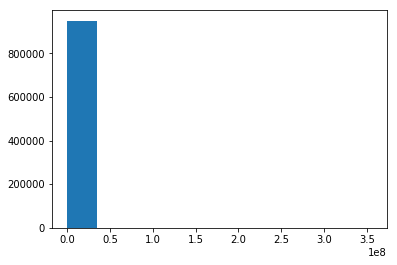

In [5]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

amount_values=df['amount'].values
plt.hist(amount_values)

%matplotlib inline
oldbalanceOrg_values=df['oldbalanceOrg'].values
plt.hist(oldbalanceOrg_values)


%matplotlib inline
newbalanceOrig_values=df['newbalanceOrig'].values
plt.hist(newbalanceOrig_values)

%matplotlib inline
oldbalanceDest_values=df['oldbalanceDest'].values
plt.hist(oldbalanceDest_values)

%matplotlib inline
newbalanceDest_values=df['newbalanceDest'].values
plt.hist(newbalanceDest_values)


In [6]:
df['amount'].values

from sklearn import preprocessing

min_max_scaler1 = preprocessing.MinMaxScaler()
np_scaled1 = min_max_scaler1.fit_transform(df[['amount']])
amount_df_normalized = pd.DataFrame(np_scaled1)
amount_df_normalized.values

min_max_scaler2 = preprocessing.MinMaxScaler()
np_scaled2 = min_max_scaler2.fit_transform(df[['oldbalanceOrg']])
oldbalanceOrg_df_normalized = pd.DataFrame(np_scaled2)
oldbalanceOrg_df_normalized.values

min_max_scaler3 = preprocessing.MinMaxScaler()
np_scaled3 = min_max_scaler3.fit_transform(df[['newbalanceOrig']])
newbalanceOrig_df_normalized = pd.DataFrame(np_scaled3)
newbalanceOrig_df_normalized.values

min_max_scaler4 = preprocessing.MinMaxScaler()
np_scaled4 = min_max_scaler4.fit_transform(df[['oldbalanceDest']])
oldbalanceDest_df_normalized = pd.DataFrame(np_scaled4)
oldbalanceDest_df_normalized.values

min_max_scaler5 = preprocessing.MinMaxScaler()
np_scaled5 = min_max_scaler5.fit_transform(df[['newbalanceDest']])
newbalanceDest_df_normalized = pd.DataFrame(np_scaled5)
newbalanceDest_df_normalized.values




array([[1.89971268e-03],
       [3.88722314e-03],
       [1.93209417e-02],
       ...,
       [3.44264241e-02],
       [8.74732335e-05],
       [8.38343617e-04]])

# Plots 

In [0]:
import seaborn as sns

#%matplotlib inline
#plt.hist(amount_df_normalized.values)
#sns.distplot(amount_df_normalized.values)
#sns.distplot(amount_df_normalized.values, hist=False, rug=True)
#sns.distplot(amount_df_normalized.values, bins=40, kde=False, rug=True)
#sns.kdeplot(amount_df_normalized.values, shade=True)
#sns.distplot(amount_values, bins=40, kde=False, rug=True);

sns.pairplot(df, hue='amount', palette='coolwarm')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


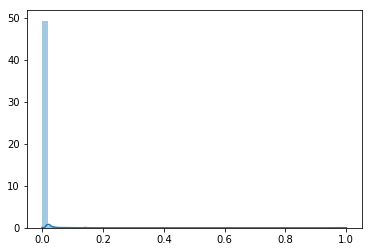

In [0]:
import seaborn as sns
sns.distplot(amount_df_normalized.values)

TypeError: ignored

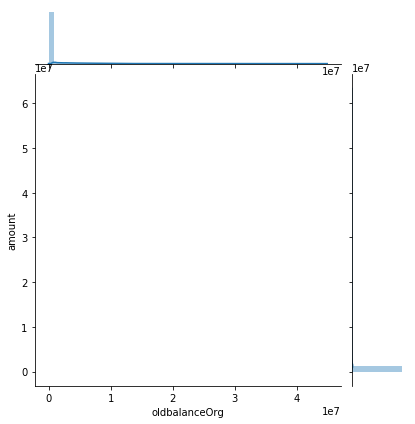

In [0]:
import seaborn as sns
#sns.distplot(df['amount'].values, kde=False, bins=30 )
#sns.jointplot(x='oldbalanceOrg', y='amount', data=df, kind='hex')
sns.jointplot(x='oldbalanceOrg', y='amount', data=df, kind='reg', pallete='coolwarm')

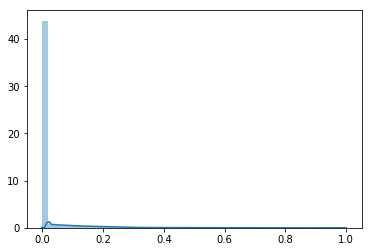

In [0]:


#%matplotlib inline
#plt.hist(oldbalanceOrg_df_normalized.values)
sns.distplot(oldbalanceOrg_df_normalized.values)


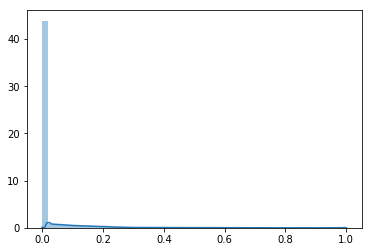

In [0]:
#%matplotlib inline
#plt.hist(newbalanceOrig_df_normalized.values)
sns.distplot(newbalanceOrig_df_normalized.values)



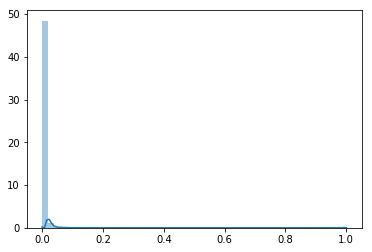

In [0]:


#%matplotlib inline
#plt.hist(oldbalanceDest_df_normalized.values)
sns.distplot(oldbalanceDest_df_normalized.values)



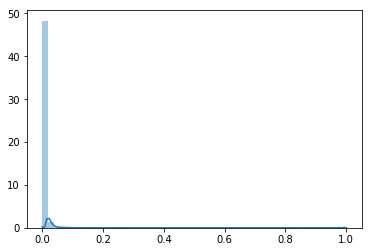

In [0]:
#%matplotlib inline
#plt.hist(newbalanceDest_df_normalized.values)
sns.distplot(newbalanceDest_df_normalized.values)

In [7]:
np.unique(df['nameOrig'])

array(['C1000006873', 'C1000008582', 'C1000009272', ..., 'C999996950',
       'C999998175', 'C999999254'], dtype=object)

In [8]:
np.unique(df['nameDest'])

array(['C1000004082', 'C1000004940', 'C1000013769', ..., 'M999976090',
       'M999996397', 'M999998692'], dtype=object)

# Transform Catagorial data to numeric



In [9]:

isFraud = df['isFraud']
isFlaggedFraud = df['isFlaggedFraud']

new_df = pd.DataFrame()
#new_def= del df['isFlaggedFraud']
new_df= df.drop(columns=['isFraud','isFlaggedFraud','type','nameOrig','nameDest'])

lb_make = LabelEncoder()
new_df["type_transform"] = lb_make.fit_transform(df["type"])
new_df["nameOrig_transform"] = lb_make.fit_transform(df["nameOrig"])
new_df["nameDest_transform"] = lb_make.fit_transform(df["nameDest"])

#new_df= new_df.drop(columns=['isFraud','isFlaggedFraud','type','nameOrig','nameDest'])

new_df.head(3)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_transform,nameOrig_transform,nameDest_transform
step,,,,,,,,
349,498229.88,2322349.97,2820579.85,1173350.69,675120.81,0,633030,84884
277,133913.26,6521536.06,6655449.32,1515356.49,1381443.24,0,187765,155018
347,260906.45,124839.00,0.00,6605379.17,6866285.62,1,133181,228636


#Creating Train and Test data
we are spliting data to 80% for training and 20% for testing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df,isFraud , test_size=0.2)


#Normalizing Data

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modeling
The first approch for this classification was to building a model based on SVM, but due to dealing with a large dataset the processing time got time out to run on google Colab . So we decided to use SGD for classification 


In [15]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print (clf.score(X_test, y_test))

0.9988789473684211


#Evaluate Model


In [19]:
print (y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))



[0 0 0 ... 0 0 0]
Accuracy: 0.9988789473684211
Precision: 1.0
Recall: 0.12704918032786885


In [20]:

print ("Confusion Matrix:", metrics. confusion_matrix(y_test, y_pred))

Confusion Matrix: [[189756      0]
 [   213     31]]


In [21]:

print ("Area Under the ROC Curve:", metrics. roc_auc_score(y_test,y_pred))


Area Under the ROC Curve: 0.5635245901639344


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print (tree_clf.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print ("Confusion Matrix:", metrics. confusion_matrix(y_test, y_pred))

print ("Area Under the ROC Curve:", metrics. roc_auc_score(y_test,y_pred))


0.9988684210526316
Accuracy: 0.9988684210526316
Precision: 0.967741935483871
Recall: 0.12295081967213115
Confusion Matrix: [[189755      1]
 [   214     30]]
Area Under the ROC Curve: 0.5614727748732713


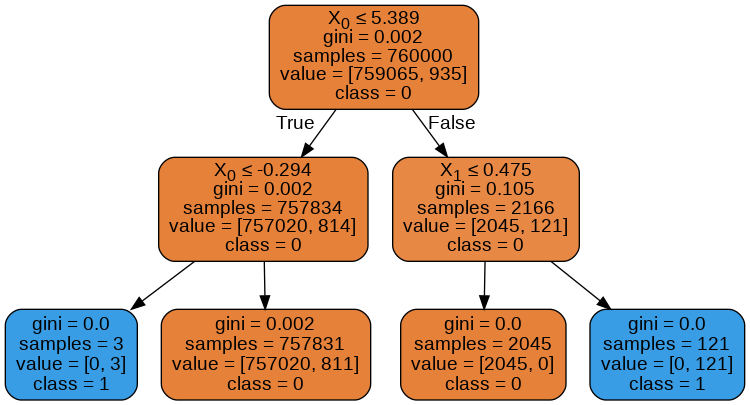

In [23]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Imbalence data - Over Sampling 

Since our data set is imbalence we are going try over sampling.  

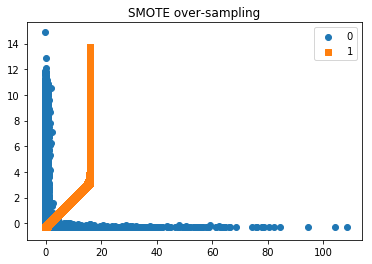

In [24]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    
# Since the dataset in imbalanced tyring the Over-sampling 

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
plot_2d_space(X_train_over, y_train_over, 'SMOTE over-sampling')



## Logistic Regression

In [41]:
 from sklearn.linear_model import LogisticRegression
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train_over, y_train_over)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
print("Accuracy_over:",metrics.accuracy_score(y_test, lr_pred))
print("Precision_over:",metrics.precision_score(y_test, lr_pred))
print("Recall_over:",metrics.recall_score(y_test, lr_pred))
print("F1 Score:", metrics.f1_score(y_test, lr_pred))
#print ("Confusion Matrix:",metrics.confusion_matrix((y_test,lr_pred))
#print ("Area Under the ROC Curve:",metrics.roc_auc_score(y_test, lr_pred))

Accuracy_over: 0.9547578947368421
Precision_over: 0.02567014993184916
Recall_over: 0.9262295081967213
F1 Score: 0.04995579133510168


## SGD Classifier

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_over, y_train_over)
y_pred_over=sgd_clf.predict(X_test)

print (sgd_clf.score(X_test, y_test))
print("Accuracy_over:",metrics.accuracy_score(y_test, y_pred_over))
print("Precision_over:",metrics.precision_score(y_test, y_pred_over))
print("Recall_over:",metrics.recall_score(y_test, y_pred_over))
print ("Confusion Matrix:", metrics. confusion_matrix(y_test, y_pred_over))
print ("Area Under the ROC Curve:", metrics. roc_auc_score(y_test,y_pred_over))

0.9603526315789473
Accuracy_over: 0.9603526315789473
Precision_over: 0.02483422181770901
Recall_over: 0.8526785714285714
Confusion Matrix: [[182276   7500]
 [    33    191]]
Area Under the ROC Curve: 0.9065791474460115


## Decision Tree

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train_over, y_train_over)
y_pred_over_train=tree_clf.predict(X_train_over)
y_pred_over=tree_clf.predict(X_test)


print (tree_clf.score(X_test, y_test))
print("Accuracy_over_train:",metrics.accuracy_score(y_train_over, y_pred_over_train))
print("Accuracy_over_test:",metrics.accuracy_score(y_test, y_pred_over))
print("Precision_over:",metrics.precision_score(y_test, y_pred_over))
print("Recall_over:",metrics.recall_score(y_test, y_pred_over))
print ("Confusion Matrix:", metrics. confusion_matrix(y_test, y_pred_over))
print ("Area Under the ROC Curve:", metrics. roc_auc_score(y_test,y_pred_over))

0.9703894736842106
Accuracy_over_train: 0.983683874240019
Accuracy_over_test: 0.9703894736842106
Precision_over: 0.04125468803273099
Recall_over: 0.9918032786885246
Confusion Matrix: [[184132   5624]
 [     2    242]]
Area Under the ROC Curve: 0.9810826085889766


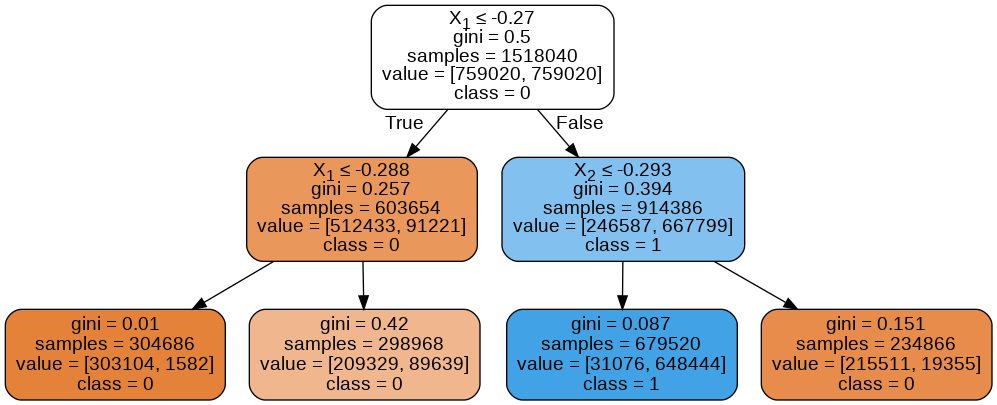

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rnd_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rnd_clf.fit(X_train_over, y_train_over)

y_pred_over=rnd_clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy_over:",metrics.accuracy_score(y_test, y_pred_over))
print("Precision_over:",metrics.precision_score(y_test, y_pred_over))
print("Recall_over:",metrics.recall_score(y_test, y_pred_over))
print ("Confusion Matrix Over:", metrics. confusion_matrix(y_test, y_pred_over))
print ("Area Under the ROC Curve Over:", metrics. roc_auc_score(y_test,y_pred_over))

Accuracy_over: 0.9987315789473684
Precision_over: 0.47961630695443647
Recall_over: 0.8928571428571429
Confusion Matrix Over: [[189559    217]
 [    24    200]]
Area Under the ROC Curve Over: 0.9458568447613427


# Voting Classifier

In [0]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('dt', tree_clf), ('rf', rnd_clf), ('sgc', sgd_clf)],
    voting='hard')
voting_clf.fit(X_train_over, y_train_over)



Accuracy_over: 0.9603526315789473
Precision_over: 0.02483422181770901
Recall_over: 0.8526785714285714
Confusion Matrix Over: [[182276   7500]
 [    33    191]]
Area Under the ROC Curve Over: 0.9065791474460115


In [0]:
y_pred_over=voting_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy_over:",metrics.accuracy_score(y_test, y_pred_over))
print("Precision_over:",metrics.precision_score(y_test, y_pred_over))
print("Recall_over:",metrics.recall_score(y_test, y_pred_over))
print ("Confusion Matrix Over:", metrics. confusion_matrix(y_test, y_pred_over))
print ("Area Under the ROC Curve Over:", metrics. roc_auc_score(y_test,y_pred_over))

Accuracy_over: 0.9886368421052631
Precision_over: 0.08494208494208494
Recall_over: 0.8839285714285714
Confusion Matrix Over: [[187643   2133]
 [    26    198]]
Area Under the ROC Curve Over: 0.9363445023907885


In [0]:
#from sklearn.metrics import accuracy_score

#for voting_clf in (tree_clf, rnd_clf, sgd_clf, voting_clf):
 #   voting_clf.fit(X_train_over, y_train_over)
  #  y_pred_over=voting_clf.predict(X_test)
   # print("train:",clf.__class__.__name__, accuracy_score(y_train, voting_clf.predict(X_train_over)))
    #print("test:",clf.__class__.__name__, accuracy_score(y_test, y_pred_over))
    #print("==================================================================")
    #print("==================================================================")
    #print("==================================================================")

train: SGDClassifier 0.9989197368421052
test: SGDClassifier 0.9990105263157895
train: SGDClassifier 0.9989197368421052
test: SGDClassifier 0.9990105263157895
train: SGDClassifier 0.9989197368421052
test: SGDClassifier 0.9990105263157895
train: SGDClassifier 0.9989197368421052
test: SGDClassifier 0.9990105263157895


#A combination of over-sampling and under-sampling

In [0]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)


clf.fit(X_train_smt, y_train_smt)
y_pred_smt = clf.predict(X_test)

print (clf.score(X_test, y_test))
print("Accuracy_smt:",metrics.accuracy_score(y_test, y_pred_smt))
print("Precision_smt:",metrics.precision_score(y_test, y_pred_smt))
print("Recall_smt:",metrics.recall_score(y_test, y_pred_smt))

In [0]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 3) 
pca.fit(X_train_smt) 
X_train_pca_smt = pca.transform(X_train_smt) 

pca.fit(X_test) 
X_test_pca = pca.transform(X_test) 



from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=10, tol=-np.infty, random_state=42, alpha=0.01)

clf.fit(X_train_pca_smt, y_train_smt)
y_pred_pca_smt = clf.predict(X_test_pca)

from sklearn import metrics
print (clf.score(X_test_pca, y_test))
print("Accuracy_smt_pca:",metrics.accuracy_score(y_test, y_pred_pca_smt))
print("Precision_smt_pca:",metrics.precision_score(y_test, y_pred_pca_smt))
print("Recall_smt_pca:",metrics.recall_score(y_test, y_pred_pca_smt))


NameError: ignored

In [0]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 3) 
pca.fit(X_train) 
X_train_pca = pca.transform(X_train) 

pca.fit(X_test) 
X_test_pca = pca.transform(X_test) 



from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=10, tol=-np.infty, random_state=42, alpha=0.01)

clf.fit(X_train_pca, y_train)
y_pred_pca_smt = clf.predict(X_test_pca)

from sklearn import metrics
print (clf.score(X_test_pca, y_test))
print("Accuracy_smt_pca:",metrics.accuracy_score(y_test, y_pred_pca_smt))
print("Precision_smt_pca:",metrics.precision_score(y_test, y_pred_pca_smt))
print("Recall_smt_pca:",metrics.recall_score(y_test, y_pred_pca_smt))


0.9987631578947368
Accuracy_smt_pca: 0.9987631578947368
Precision_smt_pca: 0.0
Recall_smt_pca: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### **Tensorflow Model

The goal is to try TensorFlow 2.0 based DNN model 



In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

     |████████████████████████████████| 332.1MB 44kB/s 
     |████████████████████████████████| 3.0MB 30.1MB/s 
     |████████████████████████████████| 419kB 35.1MB/s 


Define input layer, hidden layers, output layers

In [0]:
from tensorflow import keras

inputs = keras.Input(shape=(8,))
inputs.shape

TensorShape([None, 8])

In [0]:
from tensorflow.keras import layers
dense = layers.Dense(8, activation='relu')
xi = dense(inputs)

In [0]:
x1 = layers.Dense(15, activation='relu')(xi)
x2 = layers.Dense(13, activation='relu')(x1)
x3 = layers.Dense(11, activation='relu')(x2)
x4 = layers.Dense(7, activation='relu')(x3)
x5 = layers.Dense(4, activation='relu')(x4)
x6 = layers.Dense(2, activation='relu')(x5)

In [0]:
outputs = layers.Dense(1, activation='softmax')(x6)

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                208       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                154       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 84        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 32    

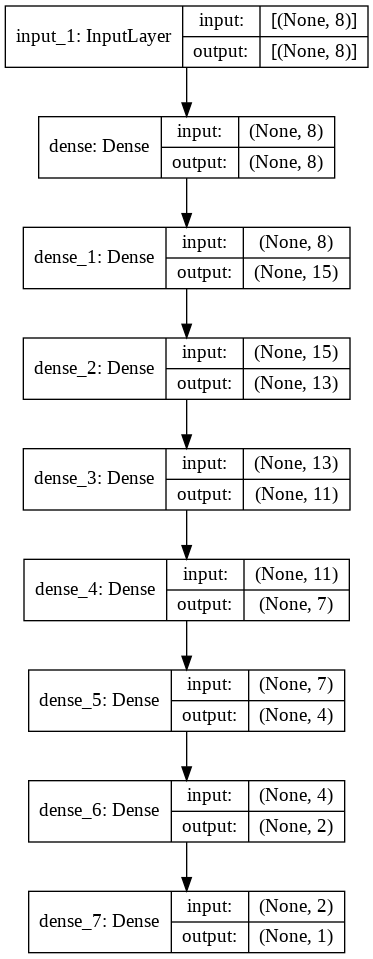

In [0]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

Compile the model, including setting the learning rate

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train_over, y_train_over,
                    batch_size=1000,
                    epochs=10,
                    validation_split=0.2)

Train on 1214372 samples, validate on 303594 samples
Epoch 1/10
1214372/1214372 [==============================] - 8s 6us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1214372/1214372 [==============================] - 8s 6us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1214372/1214372 [==============================] - 7s 6us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1214372/1214372 [==============================] - 7s 6us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1214372/1214372 [==============================] - 7s 5us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1214372/1214372 [==============================] - 7s 6us/sample - loss: 9.5833 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10


Evaluate the model.

In [0]:
test_scores = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1]*100,'%')

Test loss: 15.311610647583008
Test accuracy: 0.14105263398960233 %
